In [1]:
#Import necessary packages and load dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# Using this to figure out what directory the dataset is in.
os.getcwd()

'/Users/j/Desktop/Capstone_Two'

In [3]:
# This line reads the dataset csv file into a pandas dataframe.
df = pd.read_csv('/Users/j/Desktop/Capstone_Two/adult.data',header=None)

In [4]:
# A brief examination of the data.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Renaming the columns so that their names are more descriptive and clear:
df.columns = ['age','workclass','fnlwgt','education','educationnum','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','income']

In [6]:
# Examining the result of renaming the columns.
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


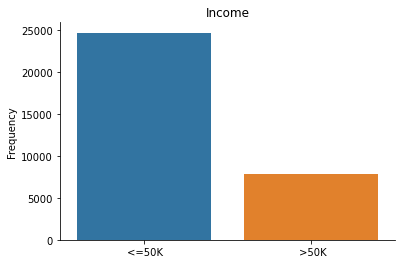

In [7]:
# Since the income column is the column that we want to predict, and is thus one of the most important columns,
# it seems useful to create a count plot of this column just to get a sense of what its values are.
sns.countplot(data=df,
              x='income')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Income')
sns.despine()
plt.show()

In [8]:
# This operation below displays some of the counts of how many members in the dataset had a given age. It is possible
# that age could play a role in predicting income, and it is useful to know if some ages are far more common than 
# others.
df.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [9]:
# This converts the categorical data in the income column to boolean data, which may make analysis easier.
df['income_bool'] = df.income.apply(lambda x: True if x == ' >50K' else False)

In [10]:
# These following two lines show how different columns vary by age. Looking at this may help explain how increased age
# could influence income.
df2 = df.groupby('age').mean()

In [11]:
df2.head()

,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,income_bool
age,,,,,,
17,185722.232911,6.648101,109.691139,41.751899,21.367089,0.000000
18,193530.207273,8.152727,102.058182,44.336364,25.912727,0.000000
19,204803.543539,9.096910,92.092697,43.915730,30.678371,0.002809
20,198537.705179,9.345286,82.786189,33.298805,32.280212,0.000000
21,200116.997222,9.434722,204.625000,51.636111,34.034722,0.004167


In [12]:
# This gives all the ages in our data:
df2.index

Int64Index([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 90],
           dtype='int64', name='age')

In [13]:
df2.index[1]

18

In [14]:
df2.index[0]

17

In [15]:
df2 = df2.reset_index()

In [16]:
df2.index

RangeIndex(start=0, stop=73, step=1)

In [17]:
# This creates a new variable showing the % of people earning over 50k at each age.
df2['income_bool_pct'] = df2['income_bool'] * 100

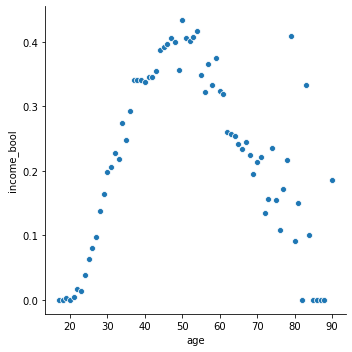

In [18]:
sns.relplot(x='age',y='income_bool',kind='scatter',data=df2)

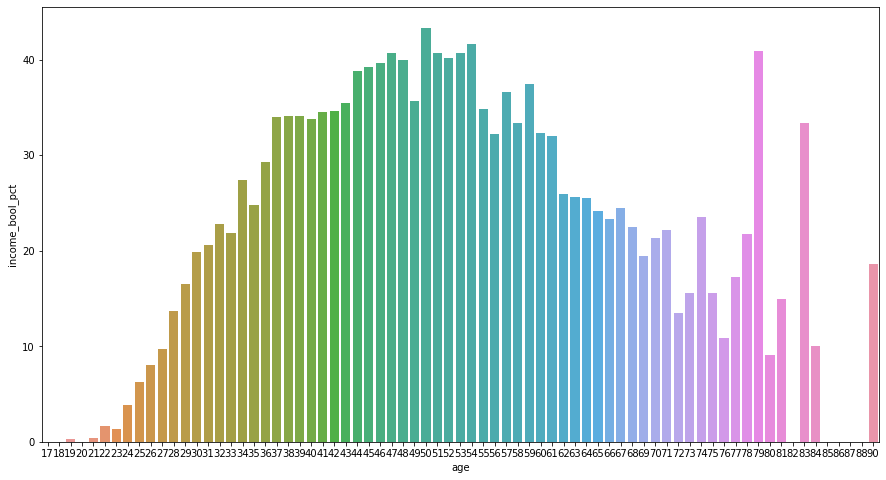

In [19]:
# In our examination of how the variable 'age' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='age',y='income_bool_pct',data=df2)

In [74]:
# It can be seen in the barplot above that the % of people who earn >50k a year seems to peak around age 50,
# and then falls off in a roughly symmetrical bell-shaped, although not necessarily normally distributed, distribution
# on either side of age 50. There are several ages between 70-90 where a high % of people seem to earn >50k, which
# could be outliers in the data. Notably, the number of participants in the age range 70-90 is quite small relative
# to people in middle age and 20s-30s, so it is possible that these results were skewed by having a handful more
# people in the elderly ages happening to earn >50k.

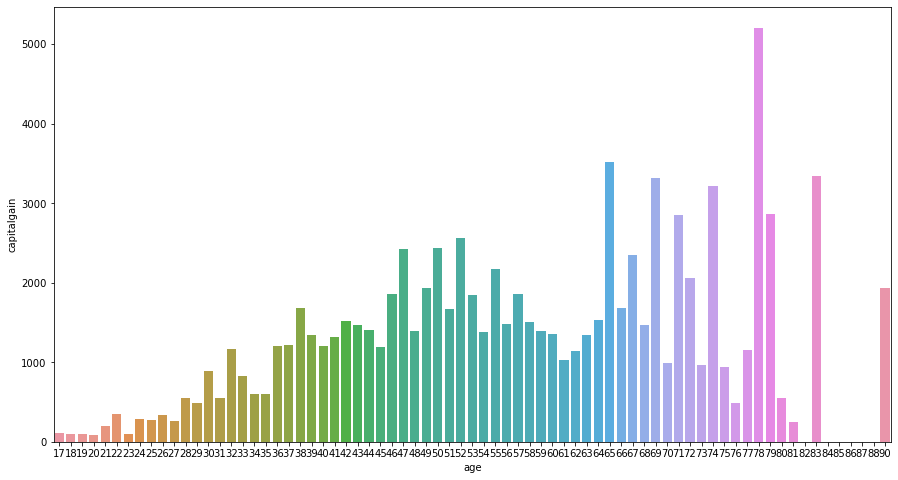

In [20]:
# Looking at explanatory variables more-specifically capitalgain.
plt.figure(figsize=(15,8))
sns.barplot(df2['age'],df2['capitalgain'])

In [21]:
# We can see that the capital gain plot vs age is very similar to the income plot vs age. Perhaps this indicates
# that capital gain would be a very good predictor of income.

In [22]:
capitalgain_info = df['capitalgain'].value_counts()
print(capitalgain_info)

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capitalgain, Length: 119, dtype: int64


In [23]:
# This creates a new variable in df showing the % of people earning over 50k at each age.
df['income_bool_pct'] = df['income_bool'] * 100

In [24]:
# The barplot below shows the distribution of income_bool_pct by education. This could be useful in elucidating the 
# relationship between education and income.

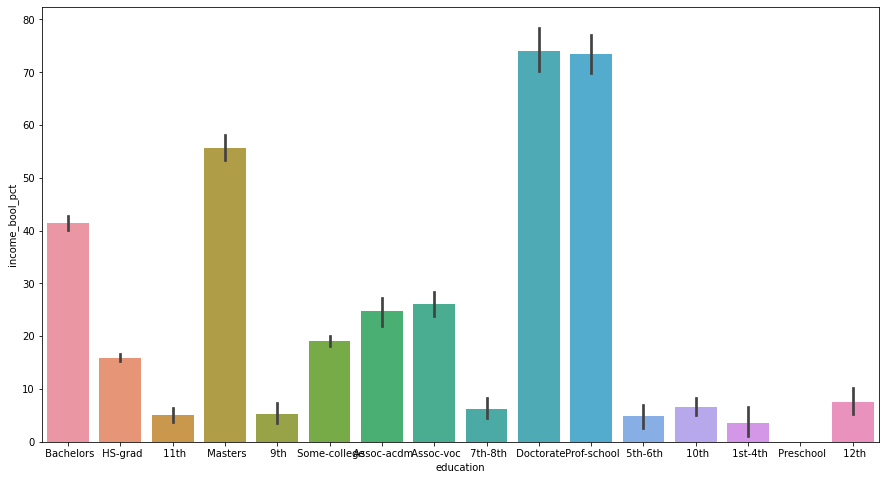

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x='education',y='income_bool_pct',data=df)

In [75]:
# The barplot above shows that doctorate and prof-school have the highest % of people earning >50k, followed by
# people with a masters. These results match general intuition/common knowledge about earnings with and without a
# higher degree.

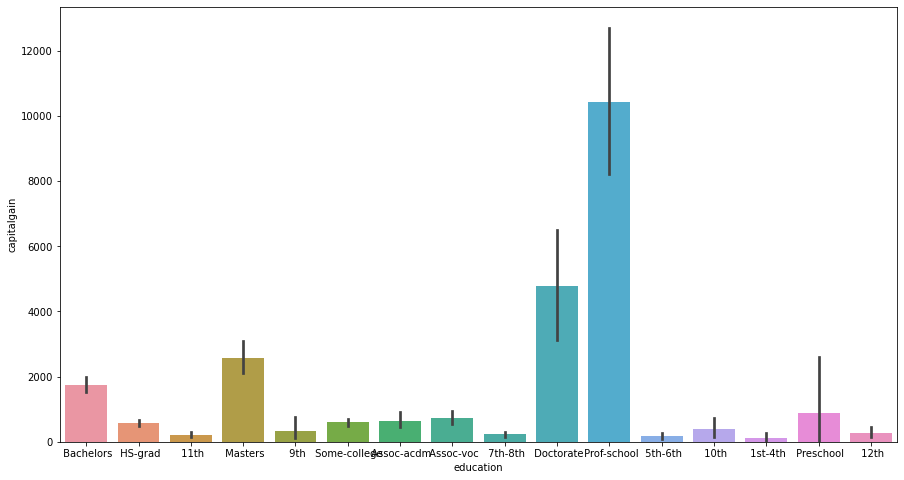

In [26]:
# The barplot below shows the distribution of capital gain by education. This could be useful in elucidating the 
# relationship between education and capital gain.
plt.figure(figsize=(15,8))
sns.barplot(x='education',y='capitalgain',data=df)

In [76]:
# The results for capital gain vs education above are very similar to the results for income vs education in that
# once again doctorate, prof-school and masters are the three categories with highest bars.

In [77]:
# The pairplot below can be useful because it shows visually how different variables are correlated with each other.
# As we can see, capital gain is positively correlated with income_bool_pct, which is what one would naively expect.
# We can also see that hours worked per week peaks with prime working age, and is lower on average for the youngest
# and oldest ages.
# It also appears that educationnum is positively correlated with income_bool_pct.
# If two variables correlate extremely highly, such as over 0.90, with one another, then it is possible they explain
# the same underlying cause. Only using one of these variables in modeling can cut down on computational costs while
# potentially not harming model performance very much.

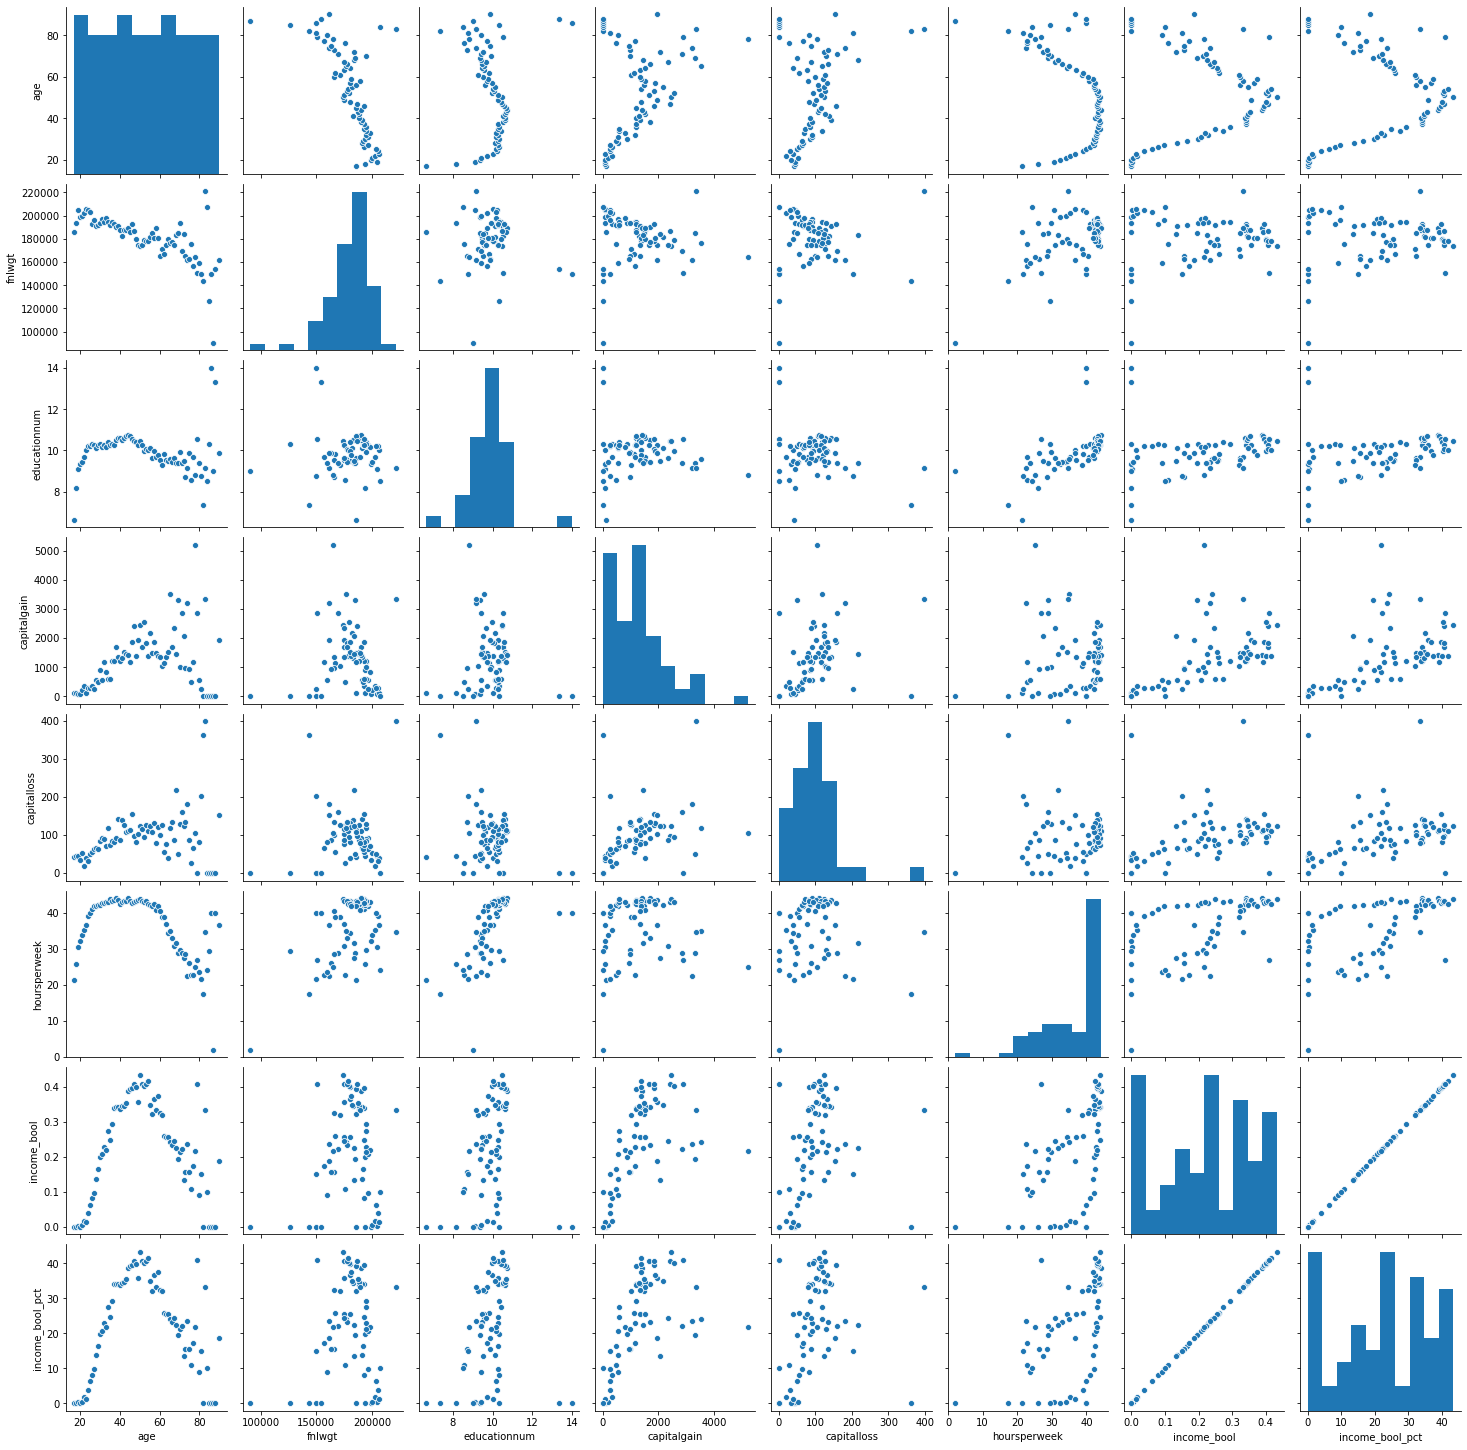

In [28]:
sns_plot = sns.pairplot(df2)
sns_plot.savefig('pairplot.png')
plt.show()

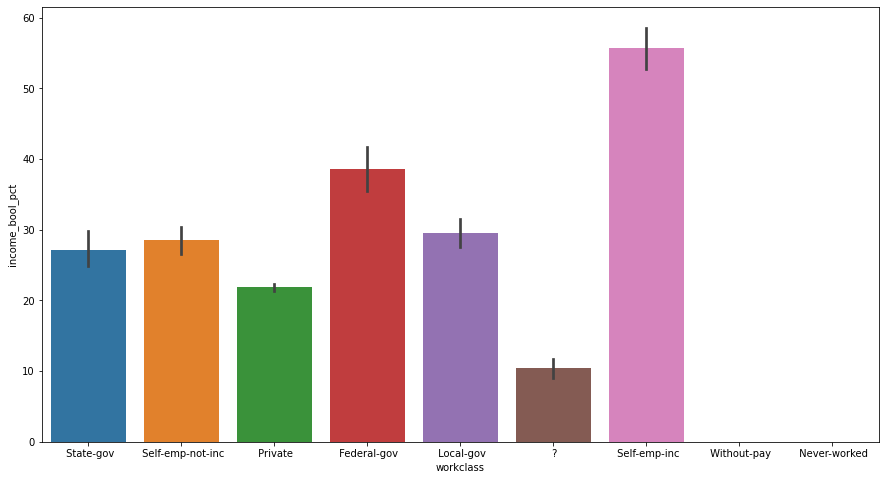

In [29]:
# In our examination of how the variable 'workclass' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns_plot = sns.barplot(x='workclass',y='income_bool_pct',data=df)
sns_plot.figure.savefig('barplot.png')
plt.show()

In [78]:
# We see that self-employed-inc earn the most followed by federal gov. Without-pay and never-worked are understandably
# the two lowest categories.

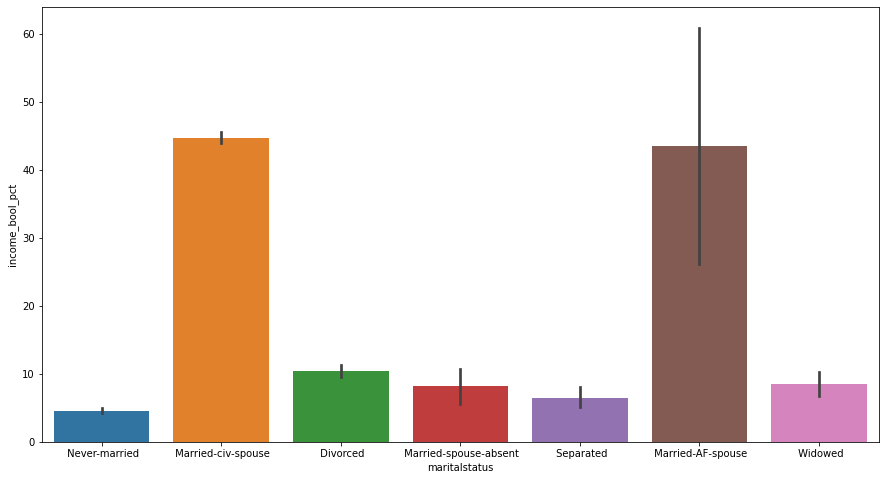

In [30]:
# In our examination of how the variable 'maritalstatus' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='maritalstatus',y='income_bool_pct',data=df)

In [79]:
# As would be expected by common knowledge, both categories of married have noticeably higher bars than divorced.

In [31]:
# tried barplot of 'income' vs 'fnlwgt' but it took too long to load, likely because 'fnlwgt' has so many different values

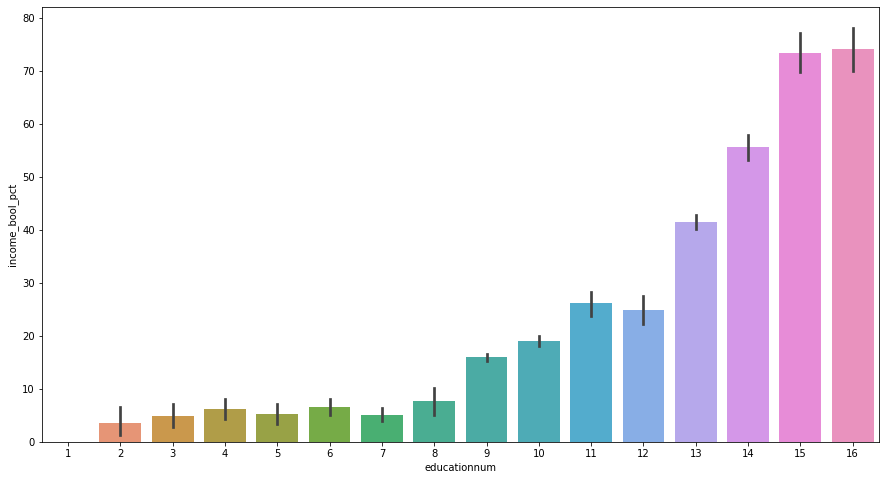

In [32]:
# In our examination of how the variable 'educationnum' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='educationnum',y='income_bool_pct',data=df)

In [80]:
# It can be seen above that amount of education seems to correlate very highly with income_bool.

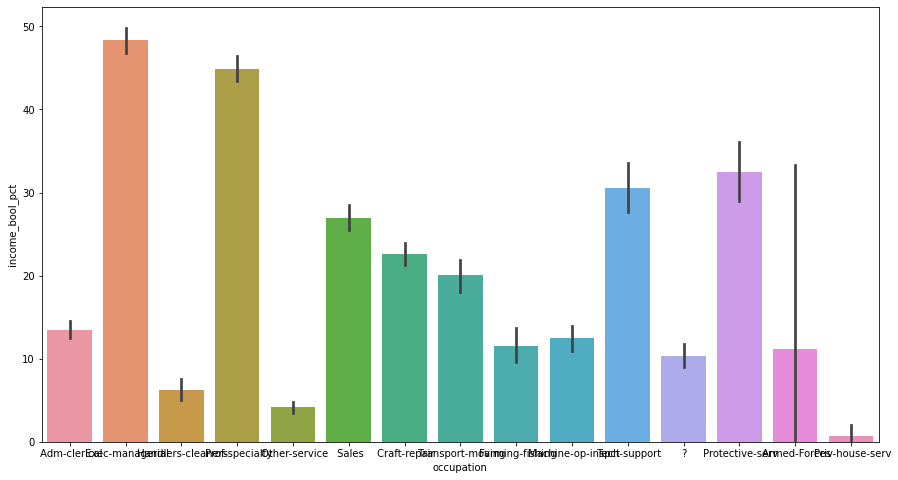

In [33]:
# In our examination of how the variable 'age' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='occupation',y='income_bool_pct',data=df)

In [81]:
# In the plot above it can be seen that exec-managerial and professional have the highest bars, which may be expected.
# There appears to be a lot of variation in income_bool by occupation.

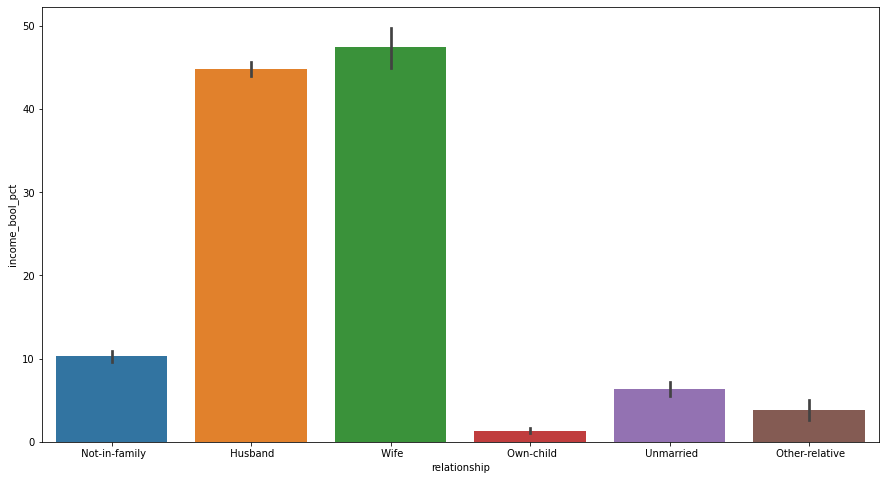

In [34]:
# In our examination of how the variable 'relationship' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='relationship',y='income_bool_pct',data=df)

In [83]:
# In the plot above wife appears to have a higher income bar than husband, but both of these categories have higher
# bars by far than any other categories. It is possible that age could play a role in explaining this phenomenon.

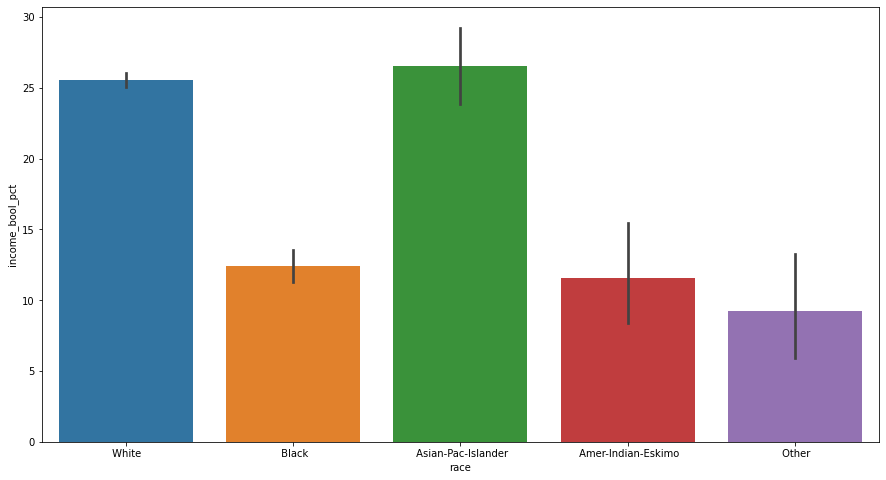

In [35]:
# In our examination of how the variable 'race' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='race',y='income_bool_pct',data=df)

In [84]:
# It can be seen in the plot above that Asian-pac-islander have the highest income bar, followed by white, followed 
# by black.

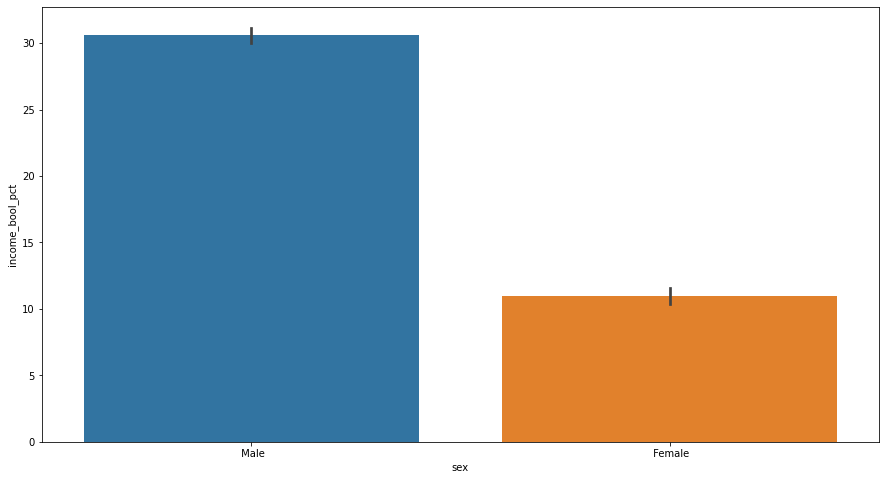

In [36]:
# In our examination of how the variable 'sex' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='sex',y='income_bool_pct',data=df)

In [85]:
# This plot above appears to show that over double the % of males earn >50k than females in the dataset.

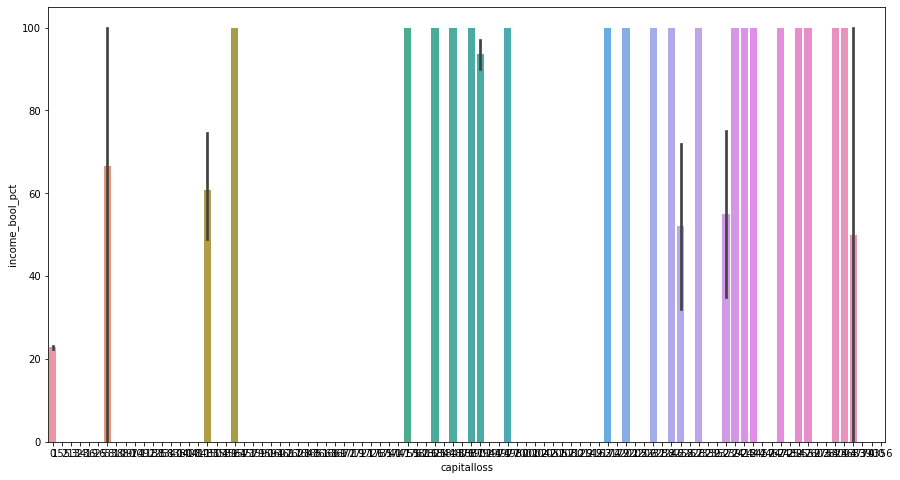

In [37]:
# In our examination of how the variable 'capitalloss' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='capitalloss',y='income_bool_pct',data=df)

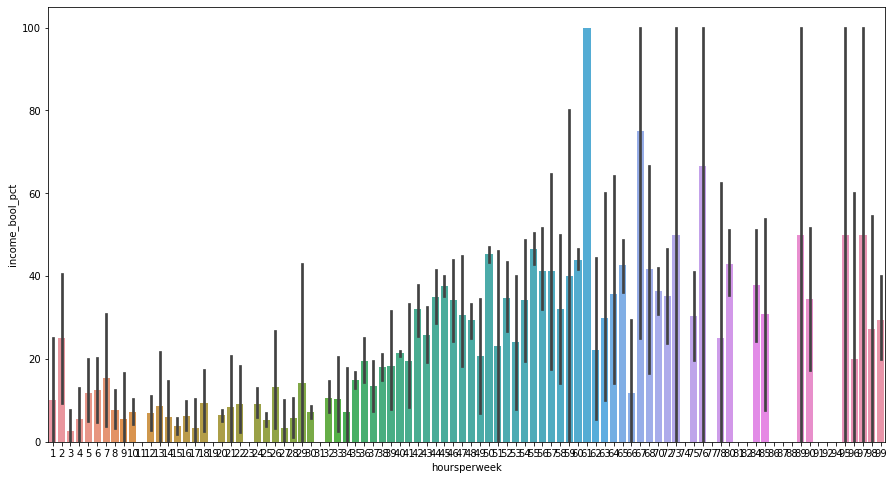

In [38]:
# In our examination of how the variable 'hoursperweek' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='hoursperweek',y='income_bool_pct',data=df)

In [86]:
# Hours worked per week seems to positively correlate with the income variable.

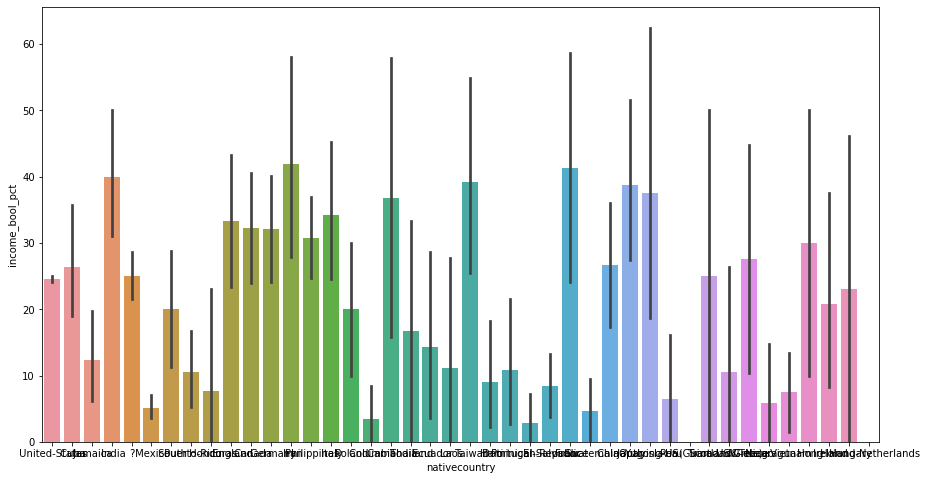

In [39]:
# In our examination of how the variable 'nativecountry' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='nativecountry',y='income_bool_pct',data=df)

In [87]:
# There is no obvious, immediately visible relationship between native country and the income variable.

In [40]:
# A barplot of every variable vs income (as income_bool_pct) has been created above.
# Now, a histogram or a seaborn countplot will be created for each numeric or categorical variable respectively 
# which will help show the distribution of values within each variable.

In [41]:
# A histogram is a useful tool for EDA because it allows one to easily visually identify the approximate mean, mode, 
# range, and even potentially interquartile range of a given column. Knowing about the values in a column can
# help the viewer see if there are any null values, any outliers, or if the mean of the column is unexpectedly large
# or small. It gives the viewer a good impression of the "spread" of the data. 

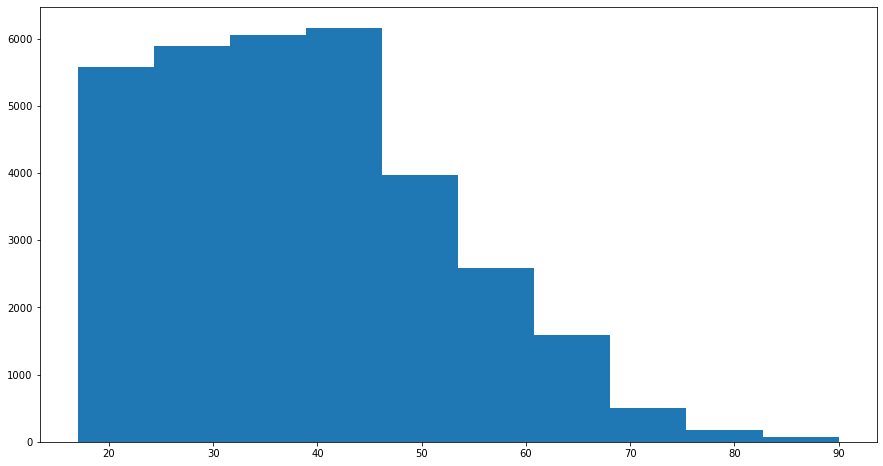

In [42]:
plt.figure(figsize=(15,8))
plt.hist('age',data=df)
plt.savefig('histogram.png')
plt.show()

In [43]:
# Based upon visual inspection of the histogram of age above, the mean age appears to be somewhere around 40.
# Furthermore, it can be seen that there are vastly more people in the dataset who are in their 20s-30s, 30s-40s,
# or 40s-50s, than there are in people in their later decades. It can also be seen that there are progressively
# fewer people in each bin, starting from around age 40 onwards.

In [44]:
# It can be seen that people between age 70 and 90 comprise a minuscule portion of the overall dataset. It appears 
# from the histogram that people age 70-90 may only be about 2-3% of the people in the dataset. This is important
# information if trying to make a model that predicts income well for people of all ages. Since there appear to be
# less than 1,000 people age 70-90 in the entire dataset, there may not be enough datapoints for people in this age
# range for the model to generalize to other people of their age. 

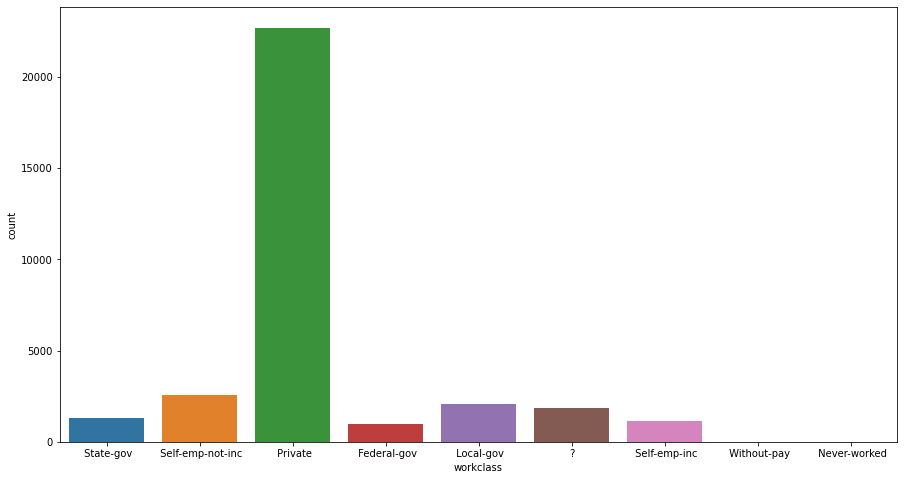

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(df['workclass'])

In [46]:
# It is interesting to note from the countplot above that by far the most people in the dataset work in a private
# business. This is opposed to working for some part of the government, or being self employed or never worked. 
# It would be interesting to know if the proportion of people in this dataset who work for a private company is 
# a higher or lower proportion than the true general population. This would be helpful in knowing if this dataset
# contains a biased sample in any way. It would not be hard to see how having a sample disproportionately biased 
# towards people in private businesses could throw off income predictions when generalizing to the entire
# population.

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

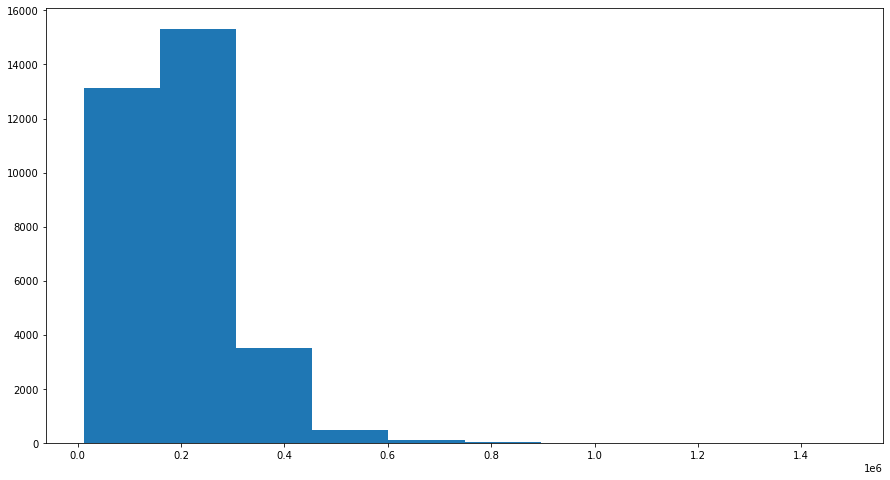

In [47]:
plt.figure(figsize=(15,8))
plt.hist('fnlwgt',data=df)

In [48]:
# The variable above, 'fnlwgt', does not have a clear description in the dataset readme, and it does not appear
# immediately obvious what it is. If creating a model that shareholders want to understand the entire workings of,
# it may be best to leave this variable out as it is not apparent what it is.

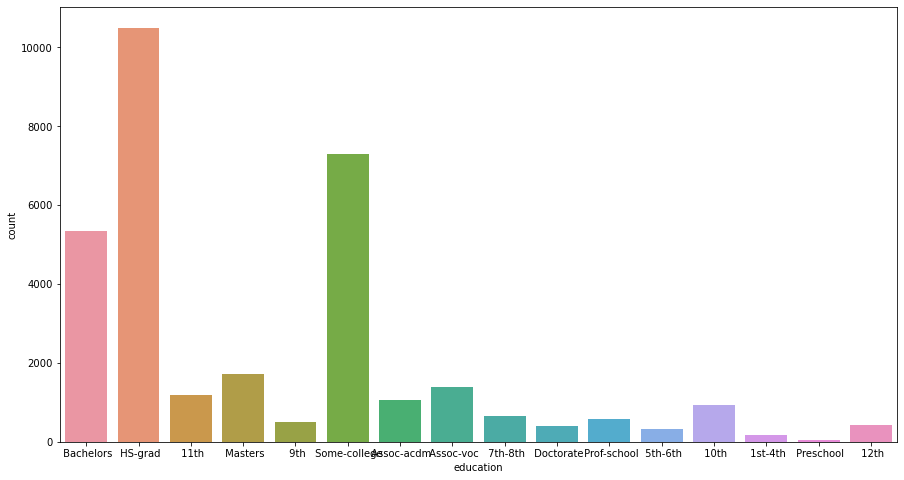

In [49]:
plt.figure(figsize=(15,8))
# plt.hist('education',data=df)
sns.countplot(df['education'])

In [50]:
# This countplot above seems to show that the vast majority of people in the dataset either have a bachelors
# education, are a high school grad, or have some college. These three categories alone seem to vastly outweigh
# all of the other categories combined. Notably, the number of doctorates is very small. it appears that doctorates
# comprise about 2-3% of the dataset, which may be problematic since it can be seen earlier that having a doctorate
# can vastly influence income. For a trait that can vastly influence income, it is useful to have a higher number
# of people with that trait in the dataset.

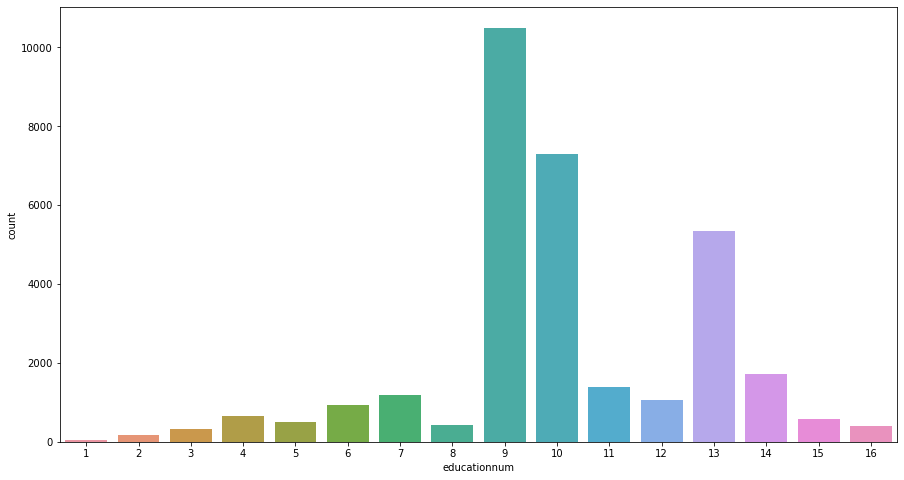

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(df['educationnum'])

In [52]:
# The variable in the countplot above, educationnum, captures very similar info to education. Educationnum just
# happens to be in a less user-interpretable format. It may be that using education would generally be better than
# educationnum because education has categories easily labeled. However, it will be worthwhile to try and see if
# there is any difference in predictive power between education and educationnum. Notably, both variables have 16 
# different categories, so it seems unlikely that educationnum could provide any more granular data than education.

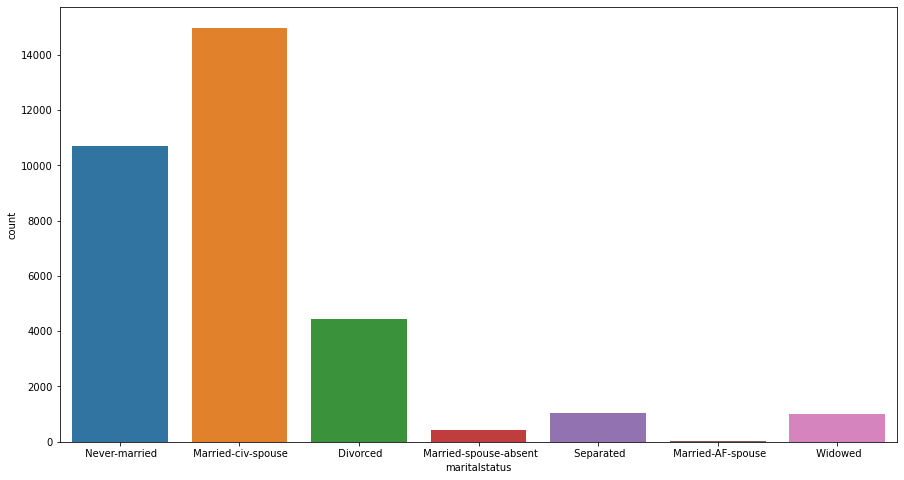

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(df['maritalstatus'])

In [54]:
# The countplot of marital status above shows that married-civ-spouse is the most common category, and appears to be 
# almost 50% of individuals. The second largest category is never-married, followed by divorced. Divorced appears
# to be a large enough category, seemingly almost 5,000 members, that it could be used to make predictions that 
# generalize to the overall divorced population.

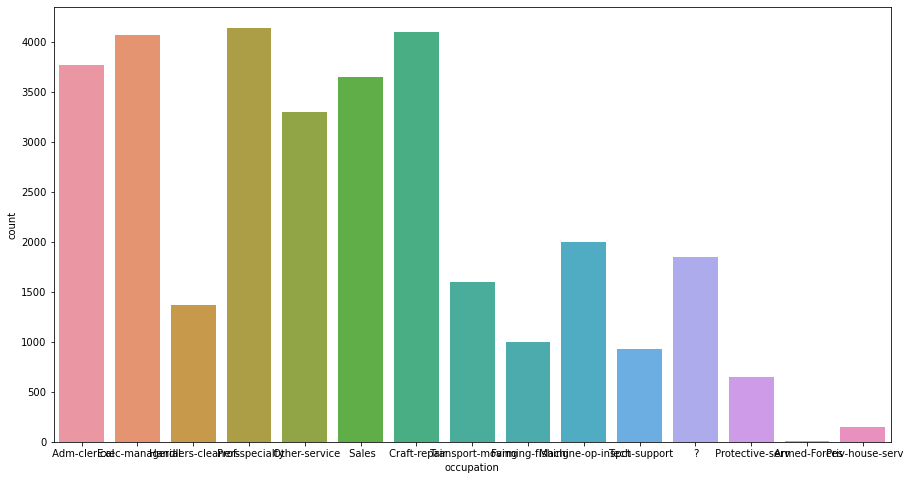

In [55]:
plt.figure(figsize=(15,8))
sns.countplot(df['occupation'])

In [56]:
# The countplot of occupation above seems to show that multiple categories are very common. In contrast to many 
# countplots/histograms we've just seen, where 1-3 categories/bins seem to predominate, in this countplot there appear
# to be 6 common categories that are way more common than the others. However, all categories except around 3 seem to
# have 1,000 individuals or more, which means that they could be more likely to have enough datapoints to generalize 
# to the overall population.

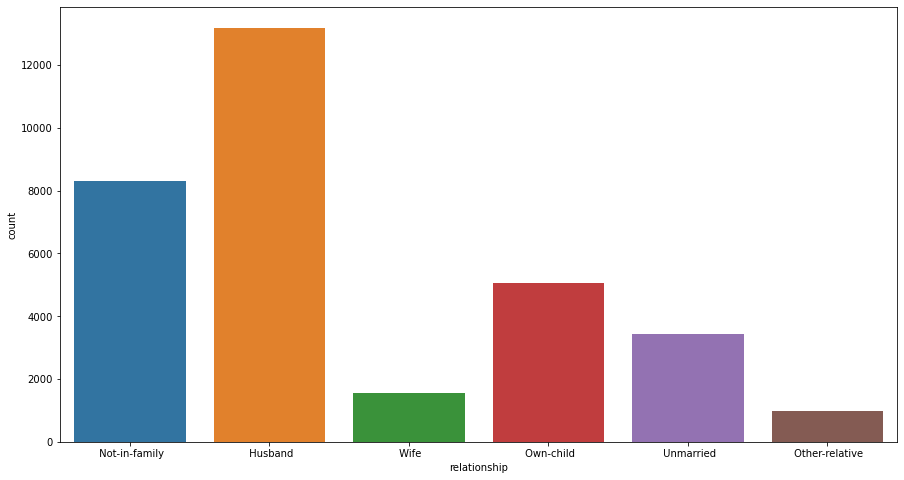

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(df['relationship'])

In [58]:
# In this countplot above it can be seen that husband is the most common relationship, followed by not-in-family 
# and then own-child. The fact that husband is the most common by far may reflect the fact that the dataset is 
# predominantly male.

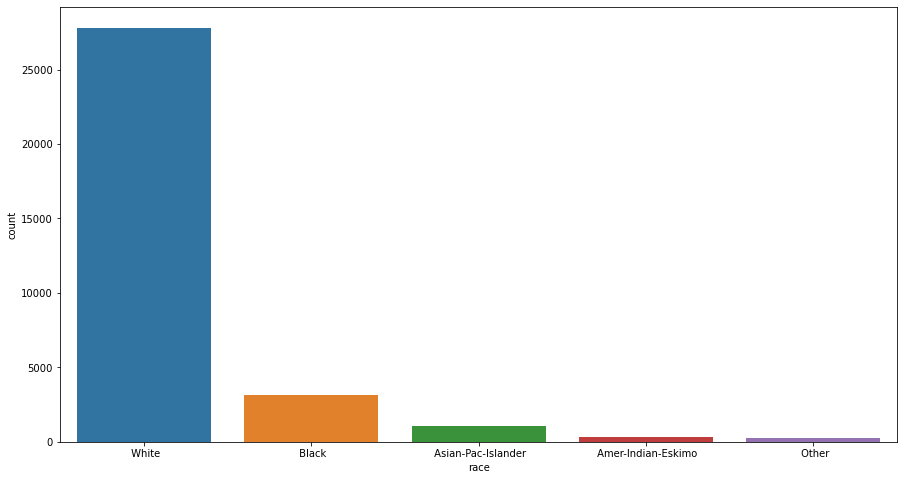

In [59]:
plt.figure(figsize=(15,8))
sns.countplot(df['race'])

In [60]:
# The countplot above seems to show that the dataset is predominantly white, seemingly over 80%. This could be an 
# issue if it is found that the smaller sample sizes of other races makes it difficult to generalize results about
# other races to that race in the general population.

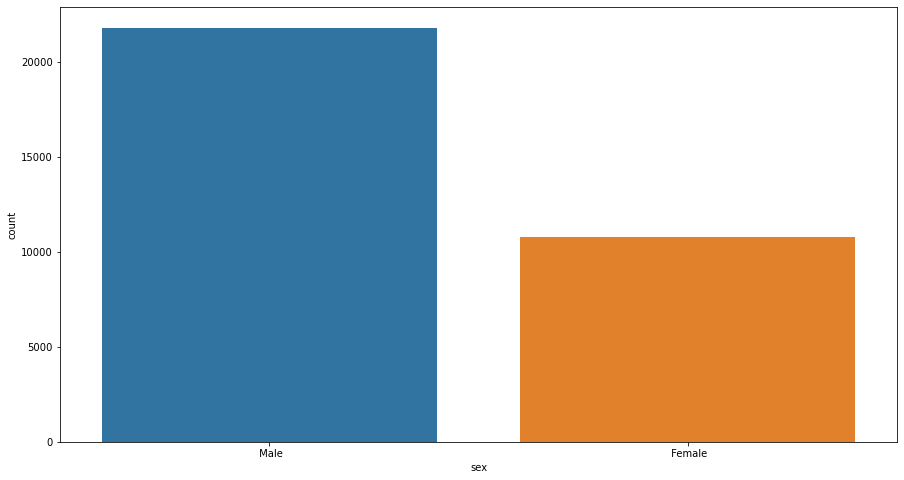

In [61]:
plt.figure(figsize=(15,8))
sns.countplot(df['sex'])

In [62]:
# In the countplot above we can see that the dataset appears to be about 2/3 male and 1/3 female. There appear to be
# enough females for a model to be able to potentially generalize results to all the female population.

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

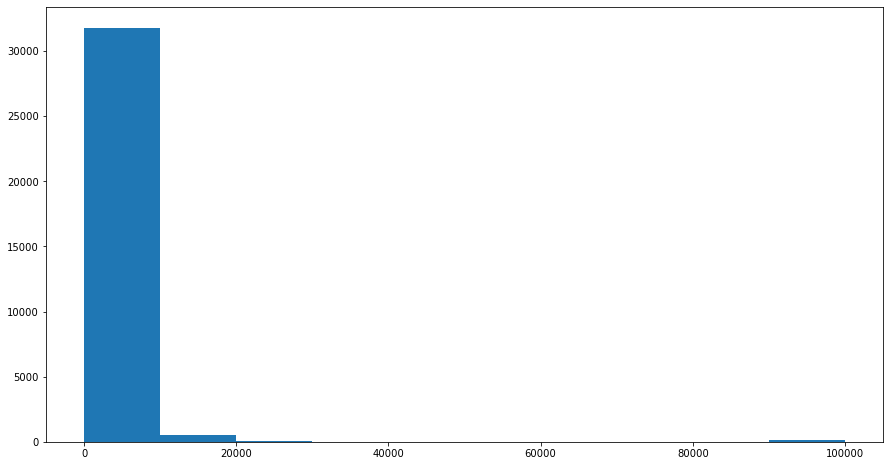

In [63]:
plt.figure(figsize=(15,8))
plt.hist('capitalgain',data=df)

In [64]:
# The histogram above seems to show that the vast majority of people have capital gains near 0. This could make
# sense when considering that most people probably do not have a large amount of money to invest, and that only
# a small fraction of the population, most likely wealthy individuals, would be earning capital gains. While over
# 95% of individuals seem to be in the bin closest to 0, a tiny fraction have modest capital gains of 10-20k, and
# another small fraction have capital gains of 90-100k.

(array([3.1053e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

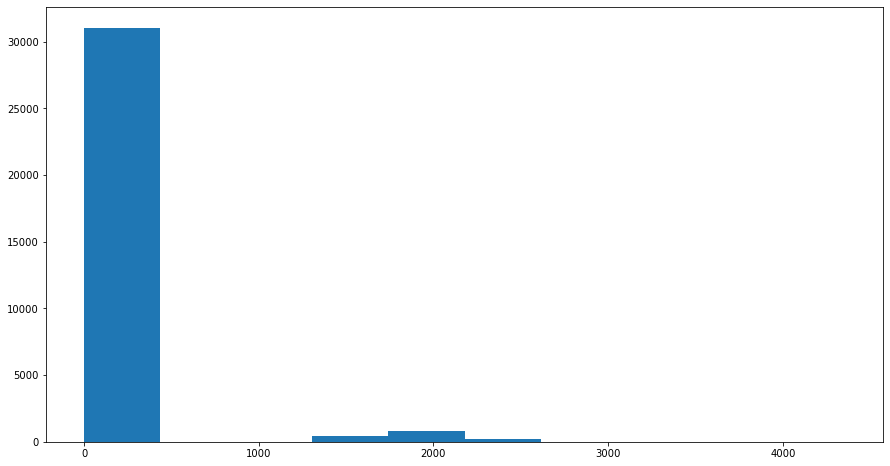

In [65]:
plt.figure(figsize=(15,8))
plt.hist('capitalloss',data=df)

In [66]:
# The histogram of capital loss seems to tell a similar story to the histogram of capital gain. In this histogram
# it can be seen that apparently over 95% of individuals have minimal capital losses, which is likely not due to 
# everyone being a talented investor but instead because most individuals do not have money to invest at all.

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

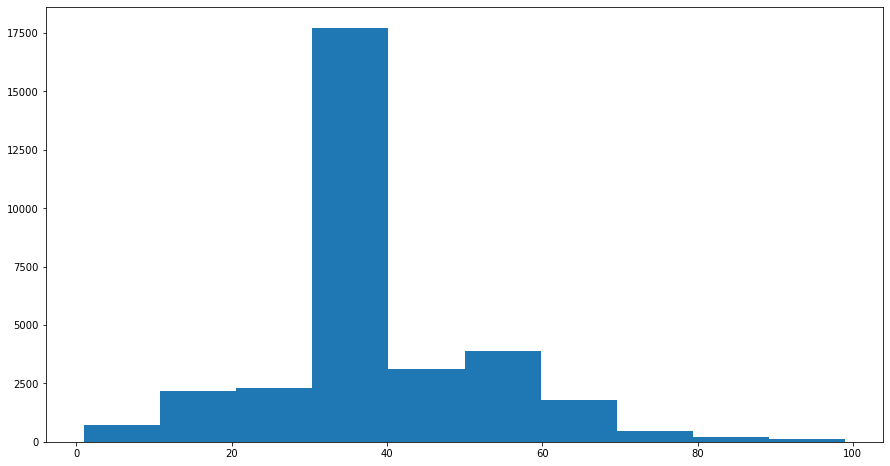

In [67]:
plt.figure(figsize=(15,8))
plt.hist('hoursperweek',data=df)

In [68]:
# The histogram of hours per week seems to show a mean around 30-40 hours, with a very large amount of the population
# seeming to fall in the bin of 30-40 hours a week. The range runs from almost 0 to almost 100. 

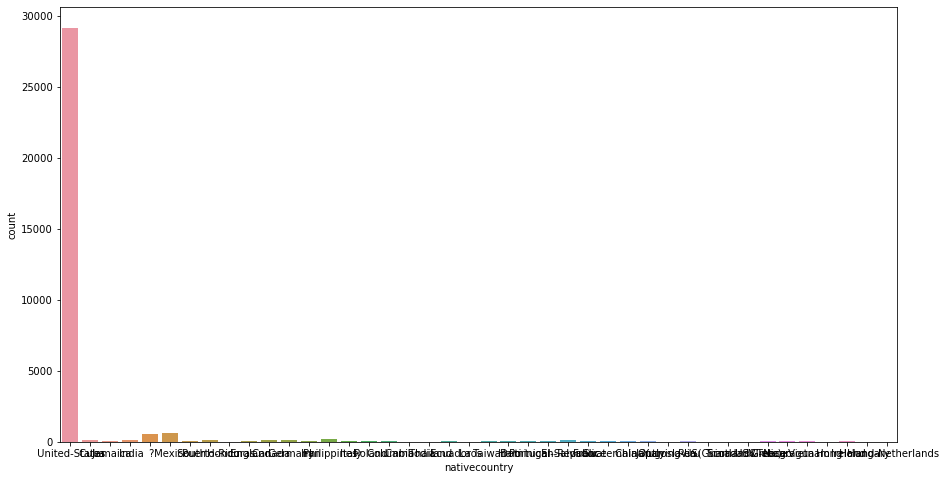

In [69]:
plt.figure(figsize=(15,8))
sns.countplot(df['nativecountry'])

In [70]:
# This countplot above shows that seemingly over 95% of individuals are native to the United States.
# This may be for the best because comparing/predicting income across countries could be difficult because
# of the use of different currencies and different purchasing power parity across countries.
# It is possible that using individuals only from the United States in the model could make the model even more 
# accurate.

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

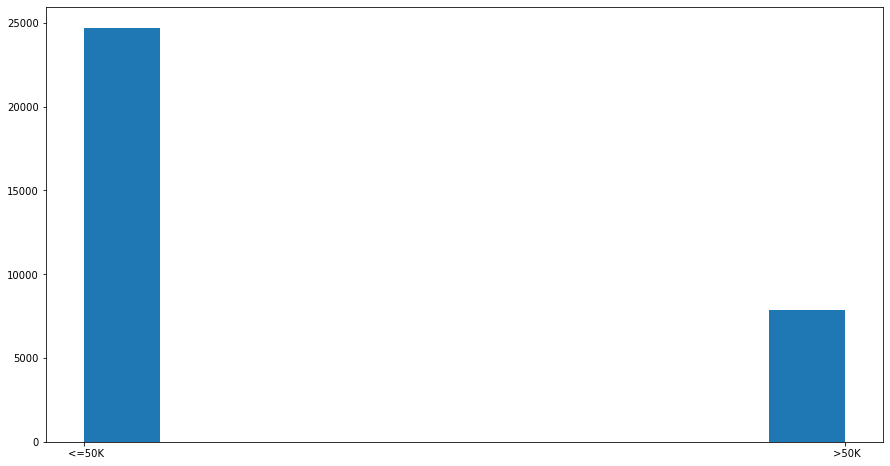

In [71]:
plt.figure(figsize=(15,8))
plt.hist('income',data=df)

In [72]:
# It can be seen from the histogram above that around 3/4 or to 4/5 of the population earn less than or equal to 50K
# a year. It would be interesting to know how closely this proportion matches the general population of the United
# States. It is important to note that this is a binary variable, and that income is not reported in terms of precise
# dollar amounts but instead as either <=50K or >50K.

In [73]:
# The histograms/countplots of each individual variable in this dataset help show the different values for each
# variable and their distribution and spread. It allows rough assessments to be made of the number of individuals
# having each value of a variable. If too few participants have a given variable value, this can be useful knowledge, 
# because it could mean that a model will have trouble making predictions about people in the general population
# having that trait.